# OSA-CASE STUDY

### EDA process for regression

Importamos las librerías que vamos a necesitar para hacer el proceso EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from pandas.plotting import scatter_matrix
import scipy.stats as st

Importamos el excel donde están los datos que vamos a tratar

In [2]:
data = pd.read_excel("../DATA/OSA_DF.xlsx")

In [3]:
data.shape

(628, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Patient   628 non-null    object 
 1   Gender    628 non-null    object 
 2   IAH       628 non-null    float64
 3   Weight    628 non-null    int64  
 4   Height    628 non-null    int64  
 5   BMI       628 non-null    float64
 6   Age       628 non-null    int64  
 7   Cervical  628 non-null    float64
 8   Smoker    628 non-null    object 
 9   Snorer    628 non-null    object 
 10  Illness   628 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 54.1+ KB


In [5]:
data.describe()

,IAH,Weight,Height,BMI,Age,Cervical
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,20.334809,87.656051,171.386943,29.801522,49.409236,40.635192
std,18.610080,18.245609,9.486410,5.572540,12.360212,3.968884
min,0.000000,48.000000,144.000000,18.289895,20.000000,30.000000
25%,6.375000,75.000000,165.000000,26.035590,40.000000,38.000000
50%,14.300000,85.500000,171.000000,28.680111,49.000000,41.000000
75%,30.000000,97.250000,178.000000,32.610544,59.000000,43.000000
max,108.600000,165.000000,197.000000,63.654952,88.000000,53.000000


In [6]:
data['Gender'].value_counts()

hombre    453
mujer     175
Name: Gender, dtype: int64

In [7]:
data['Gender']=data['Gender'].replace('hombre', 0)
data['Gender']=data['Gender'].replace('mujer', 1)

In [8]:
data['Snorer'].value_counts()

si      435
no      177
CPAP     16
Name: Snorer, dtype: int64

In [9]:
data['Snorer']=data['Snorer'].replace('si', 0)
data['Snorer']=data['Snorer'].replace('no', 1)
data['Snorer']=data['Snorer'].replace('CPAP', 2)

In [10]:
data['Smoker'].value_counts()

no     353
si     162
old    113
Name: Smoker, dtype: int64

In [11]:
data['Smoker']=data['Smoker'].replace('si', 0)
data['Smoker']=data['Smoker'].replace('no', 1)
data['Smoker']=data['Smoker'].replace('old', 2)

In [12]:
data['Illness'].value_counts()

si    352
no    276
Name: Illness, dtype: int64

In [13]:
data['Illness']=data['Illness'].replace('si', 0)
data['Illness']=data['Illness'].replace('no', 1)

In [14]:
data.isna().sum().sort_values()


Patient     0
Gender      0
IAH         0
Weight      0
Height      0
BMI         0
Age         0
Cervical    0
Smoker      0
Snorer      0
Illness     0
dtype: int64

In [15]:
data[data['IAH'] >= 30].groupby('Gender')['IAH'].count()

Gender
0    135
1     27
Name: IAH, dtype: int64

In [16]:
data[data['IAH'] >= 30].groupby('Gender')['IAH'].mean()

Gender
0    45.447111
1    48.892593
Name: IAH, dtype: float64

In [17]:
data[data['IAH'] <= 10].groupby('Gender')['IAH'].count()

Gender
0    142
1     97
Name: IAH, dtype: int64

In [18]:
data[data['IAH'] <= 10].groupby('Gender')['IAH'].mean()

Gender
0    5.104225
1    4.286598
Name: IAH, dtype: float64

In [19]:
numeric_features = data.select_dtypes(include=['float64', 'int'])
numeric_features.columns


Index(['Gender', 'IAH', 'Weight', 'Height', 'BMI', 'Age', 'Cervical', 'Smoker',
       'Snorer', 'Illness'],
      dtype='object')

In [20]:
data.skew(), data.kurt()

(Gender      0.989728
 IAH         1.466846
 Weight      0.914785
 Height     -0.111385
 BMI         1.192011
 Age         0.225383
 Cervical    0.015761
 Smoker      0.083109
 Snorer      1.238527
 Illness     0.244415
 dtype: float64,
 Gender     -1.023709
 IAH         2.554575
 Weight      1.598067
 Height     -0.259397
 BMI         2.799616
 Age        -0.460955
 Cervical   -0.158990
 Smoker     -0.692895
 Snorer      0.518133
 Illness    -1.946471
 dtype: float64)

/Users/isabel.rodriguez/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/isabel.rodriguez/.local/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


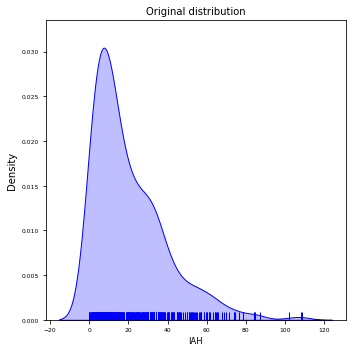

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sns.distplot(
    data.IAH,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
)
axes.set_title("Original distribution", fontsize = 'medium')
axes.set_xlabel('IAH', fontsize='small') 
axes.tick_params(labelsize = 6)

fig.tight_layout()

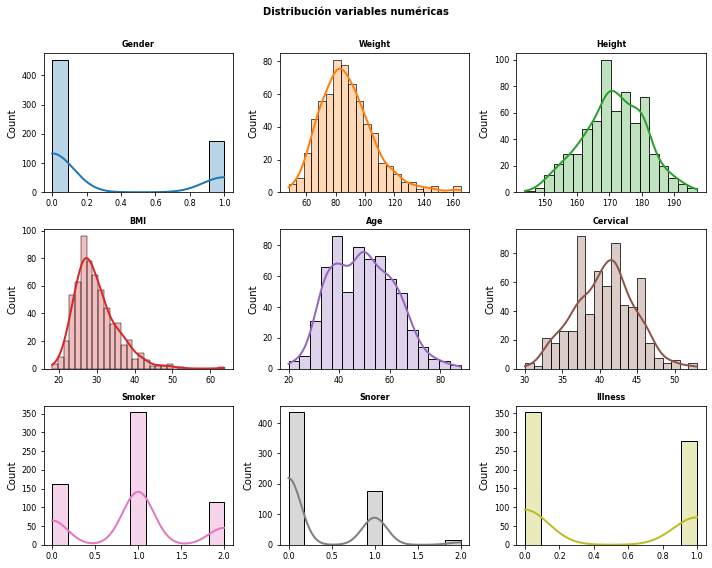

In [22]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('IAH')
for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = data,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 8, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

/Users/isabel.rodriguez/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/isabel.rodriguez/.local/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/isabel.rodriguez/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


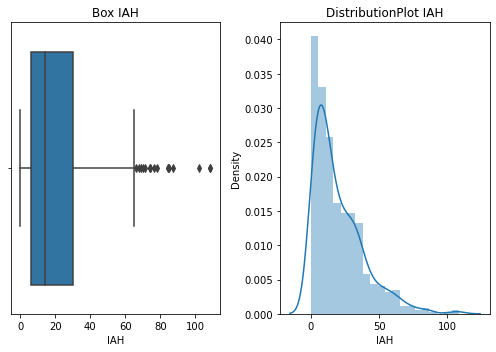

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(7,5))
axes[0].set_title('Box IAH')
axes[1].set_title('DistributionPlot IAH')

sns.boxplot(data.IAH, orient='v',ax=axes[0])
sns.distplot(data.IAH,ax=axes[1]) 


fig.tight_layout();

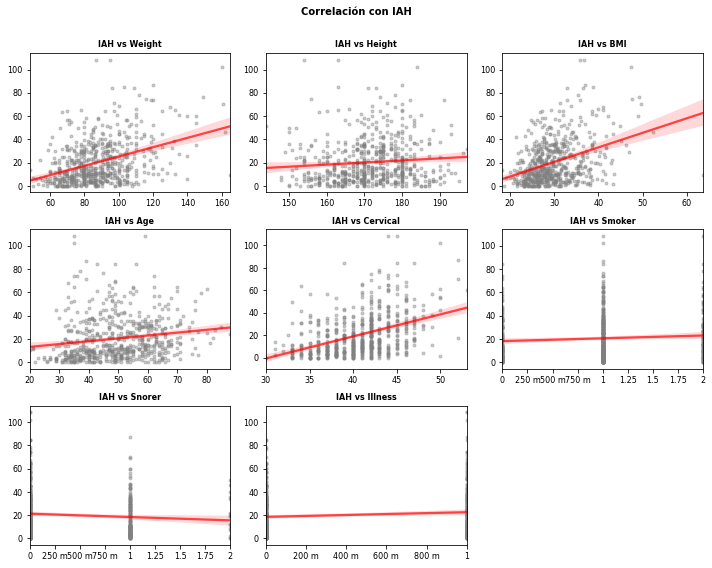

In [24]:
##### Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('IAH')
columnas_numeric = columnas_numeric.drop('Gender')
for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = data[colum],
        y           = data['IAH'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"IAH vs {colum}", fontsize = 8, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con IAH', fontsize = 10, fontweight = "bold");

In [25]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = data.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
42,BMI,Weight,0.839171,0.839171
24,Weight,BMI,0.839171,0.839171
62,Cervical,Weight,0.727061,0.727061
26,Weight,Cervical,0.727061,0.727061
30,Height,Gender,-0.673967,0.673967
3,Gender,Height,-0.673967,0.673967
6,Gender,Cervical,-0.625712,0.625712
60,Cervical,Gender,-0.625712,0.625712
64,Cervical,BMI,0.533820,0.533820
46,BMI,Cervical,0.533820,0.533820


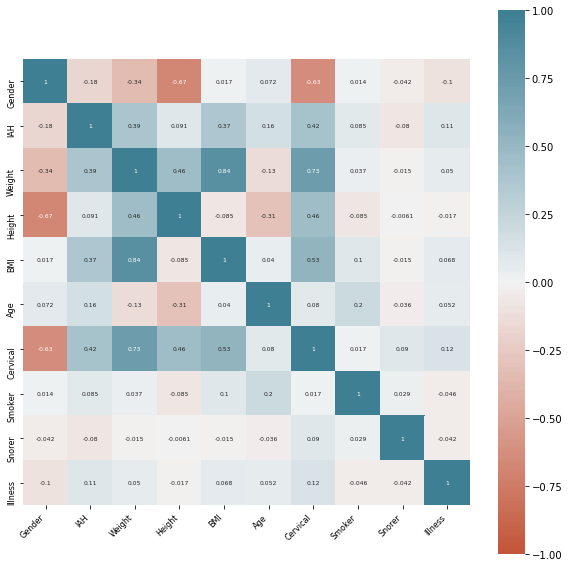

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

plt.show()

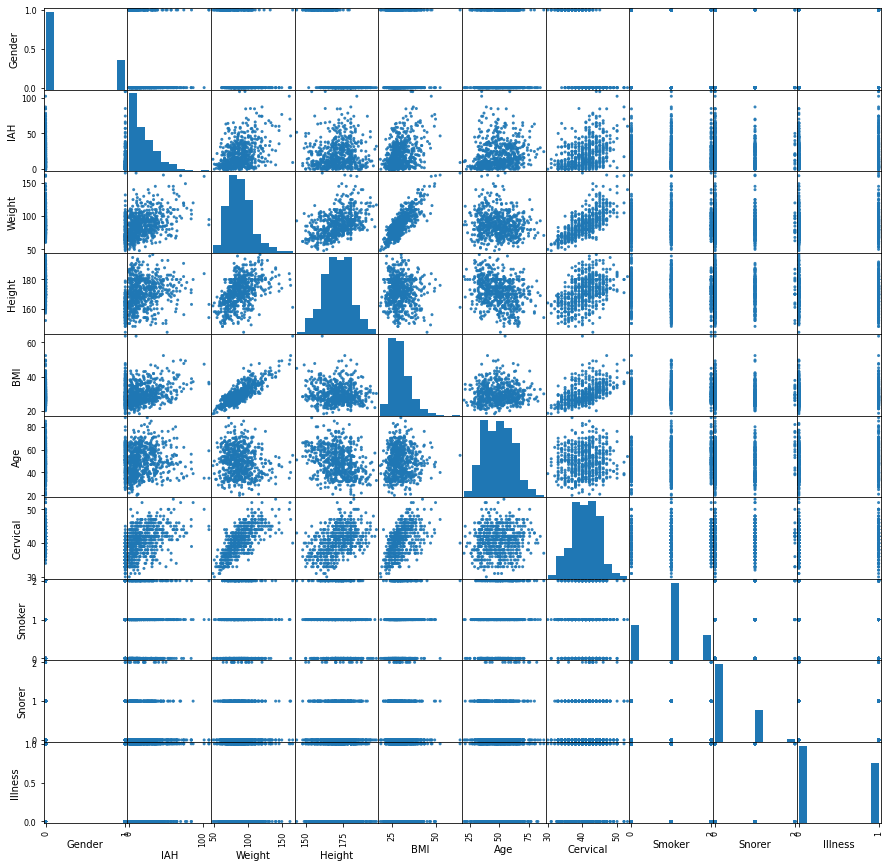

In [27]:
axes = scatter_matrix(data, alpha=0.9, figsize=(15, 15), diagonal='hist')

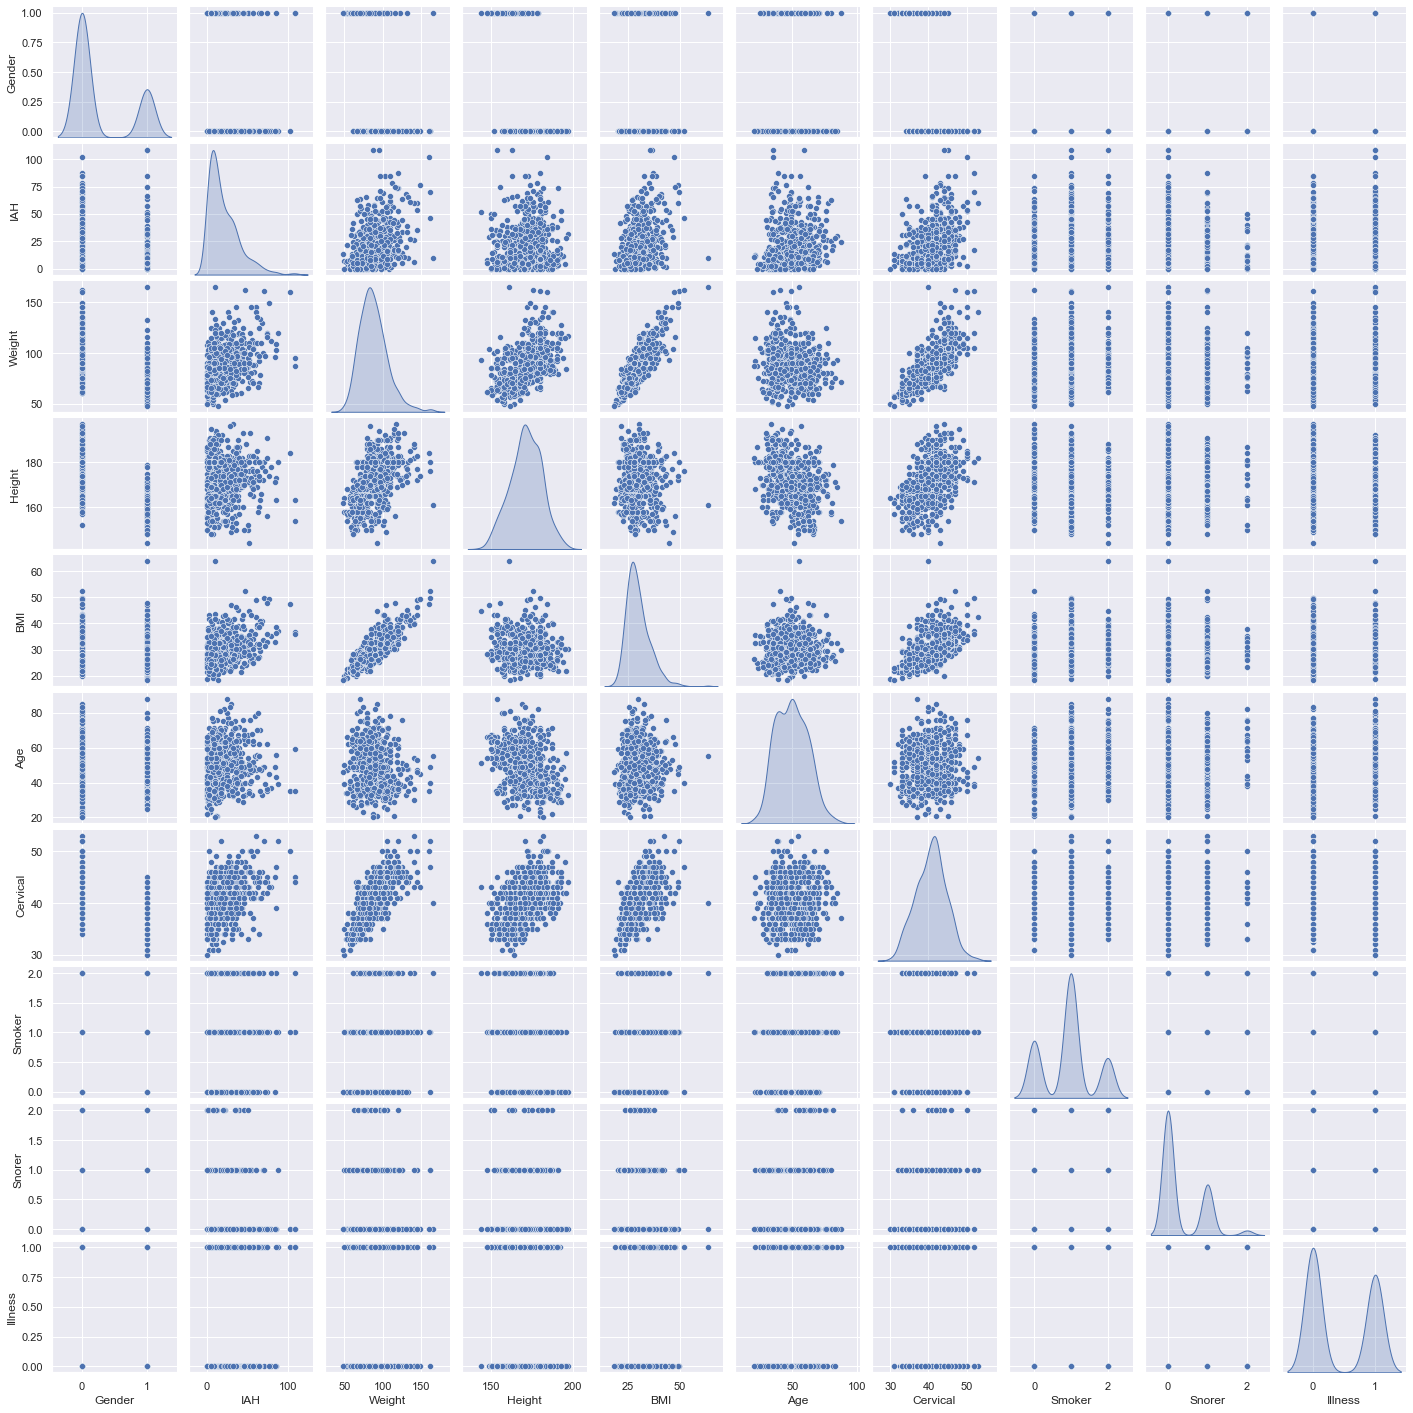

In [28]:
sns.set()
columns = data.select_dtypes(include=['float64', 'int']).columns
sns.pairplot(data[columns],height = 2, kind ='scatter',diag_kind='kde')
plt.show()

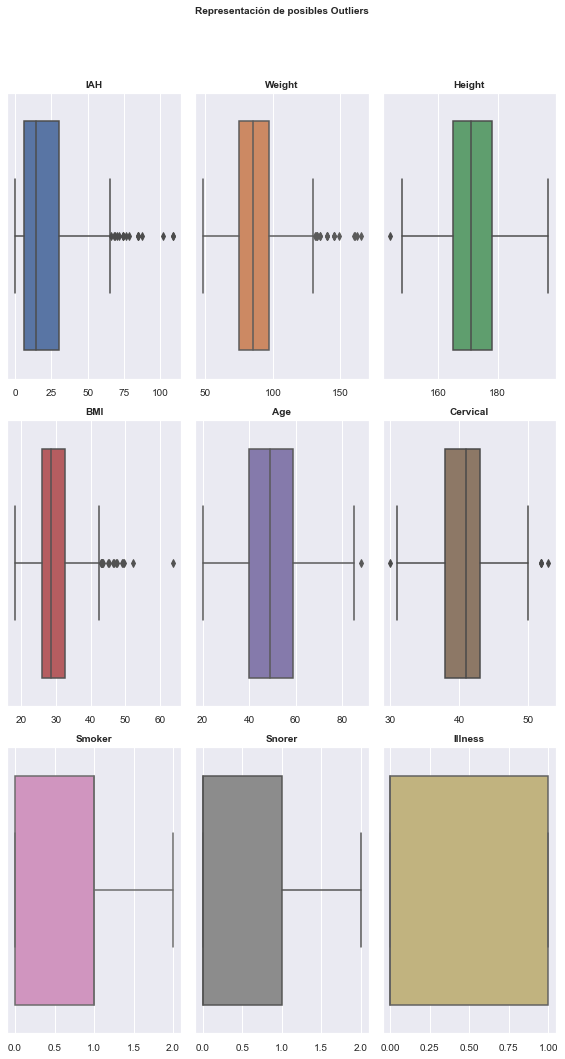

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 15))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Gender')
for i, colum in enumerate(columnas_numeric):
    sns.boxplot(
        data    = data,
        x       = colum,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Representación de posibles Outliers', fontsize = 10, fontweight = "bold");

In [30]:
data = data.set_index('Patient')

In [31]:
data[((data.IAH>10) & (data.IAH<30))].groupby('Gender')['IAH'].count()

Gender
0    176
1     51
Name: IAH, dtype: int64

In [32]:
data = data[(data.Gender==0) & ((data.IAH<=10) | (data.IAH>=30))]

In [33]:
data.describe()

,Gender,IAH,Weight,Height,BMI,Age,Cervical,Smoker,Snorer,Illness
count,277.0,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,0.0,24.765921,92.072202,175.555957,29.826683,47.631769,42.163420,0.880866,0.368231,0.476534
std,0.0,22.681526,18.485850,7.395255,5.433526,12.190879,3.367383,0.656817,0.539862,0.500353
min,0.0,0.000000,61.000000,152.000000,20.619254,22.000000,34.000000,0.000000,0.000000,0.000000
25%,0.0,4.800000,80.000000,170.000000,26.029878,38.000000,40.000000,0.000000,0.000000,0.000000
50%,0.0,10.000000,88.000000,175.000000,28.735632,47.000000,42.000000,1.000000,0.000000,0.000000
75%,0.0,40.000000,100.000000,180.000000,32.215630,56.000000,44.000000,1.000000,1.000000,1.000000
max,0.0,102.000000,162.000000,197.000000,52.298554,80.000000,53.000000,2.000000,2.000000,1.000000


In [34]:
data.to_excel("../DATA/OSA_EXTREME_DF_MALES_REGRESSION.xlsx",)